In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [5]:
dframe = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
dframe.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
cat_cols = ['Over18', 'StandardHours', 'EmployeeCount', 'Gender', 'PerformanceRating', 
            'OverTime', 'MaritalStatus', 'Department', 'BusinessTravel', 'StockOptionLevel', 
            'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 
            'RelationshipSatisfaction', 'WorkLifeBalance', 'Education', 
            'JobLevel', 'EducationField', 'TrainingTimesLastYear', 
            'JobRole', 'NumCompaniesWorked']

# constant features
const_list = ['EmployeeCount',  'Over18',  'StandardHours']

In [6]:
df = dframe.drop(const_list,axis=1, inplace=True)


In [9]:
att_yes = len(dframe[dframe['Attrition']=='Yes'])
att_no = len(dframe[dframe['Attrition']=='No'])
print(att_yes,'\n',att_no)

237 
 1233


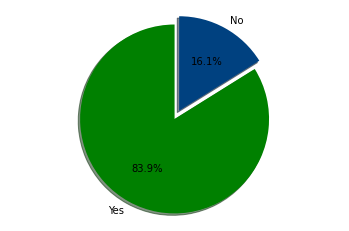

In [107]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Yes', 'No'
sizes = [1233, 237]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')


fig1, ax1 = plt.subplots()


theme = plt.get_cmap('ocean')
ax1.set_prop_cycle("color", [theme(1. * i / 2)
                             for i in range(2)])

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [25]:
dframe.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [38]:
print(pd.unique(dframe[dframe['Attrition']=='Yes'].Department))
print(dframe[dframe['Attrition']=='Yes'].groupby(['Department']).size())


print(pd.unique(dframe[dframe['Attrition']=='No'].Department))
print(dframe[dframe['Attrition']=='No'].groupby(['Department']).size())



['Sales' 'Research & Development' 'Human Resources']
Department
Human Resources            12
Research & Development    133
Sales                      92
dtype: int64
['Research & Development' 'Sales' 'Human Resources']
Department
Human Resources            51
Research & Development    828
Sales                     354
dtype: int64


In [59]:
import plotly.graph_objs as go

import plotly.express as px

labels = ['Sales', 'Research & Development', 'Human Resources']
outer_values = [446, 961, 63]
inner_values = [92, 354,
               133, 828,
               12, 51]

#common_props = dict(labels=labels,                   values=values,)

trace1 = go.Pie(
    hole=0.5,
    sort=False,
    labels=['Yes_Sales', 'No_Sales','Yes_R&D', 'No_R&D','Yes_HR', 'No_HR'],
    direction='clockwise',
    domain={'x': [0.15, 0.85], 'y': [0.15, 0.85]},
    values=inner_values,
    textinfo='label',
    textposition='inside',
    marker={'colors': ['green', 'greenyellow', 'forestgreen', 'lawngreen', 'limegreen', 'lightgreen'],
            'line': {'color': 'white', 'width': 1}}
)



trace2 = go.Pie(
    hole=0.7,
    sort=False,
    direction='clockwise',
    values=outer_values,
    labels=labels,
    textinfo='label',
    textposition='outside',
    marker={'colors': ['brown', 'sandybrown', 'saddlebrown'],
            'line': {'color': 'white', 'width': 1}}
)

fig = go.FigureWidget(data=[trace1, trace2])
fig

FigureWidget({
    'data': [{'direction': 'clockwise',
              'domain': {'x': [0.15, 0.85], 'y': [0.15,…

UNDERSTANDING THE CATEGORICAL DISTRIBUTION BY THE TARGET (ATTRITION)
NOTE: - It's a plot just about the columns with maximum 10 values.


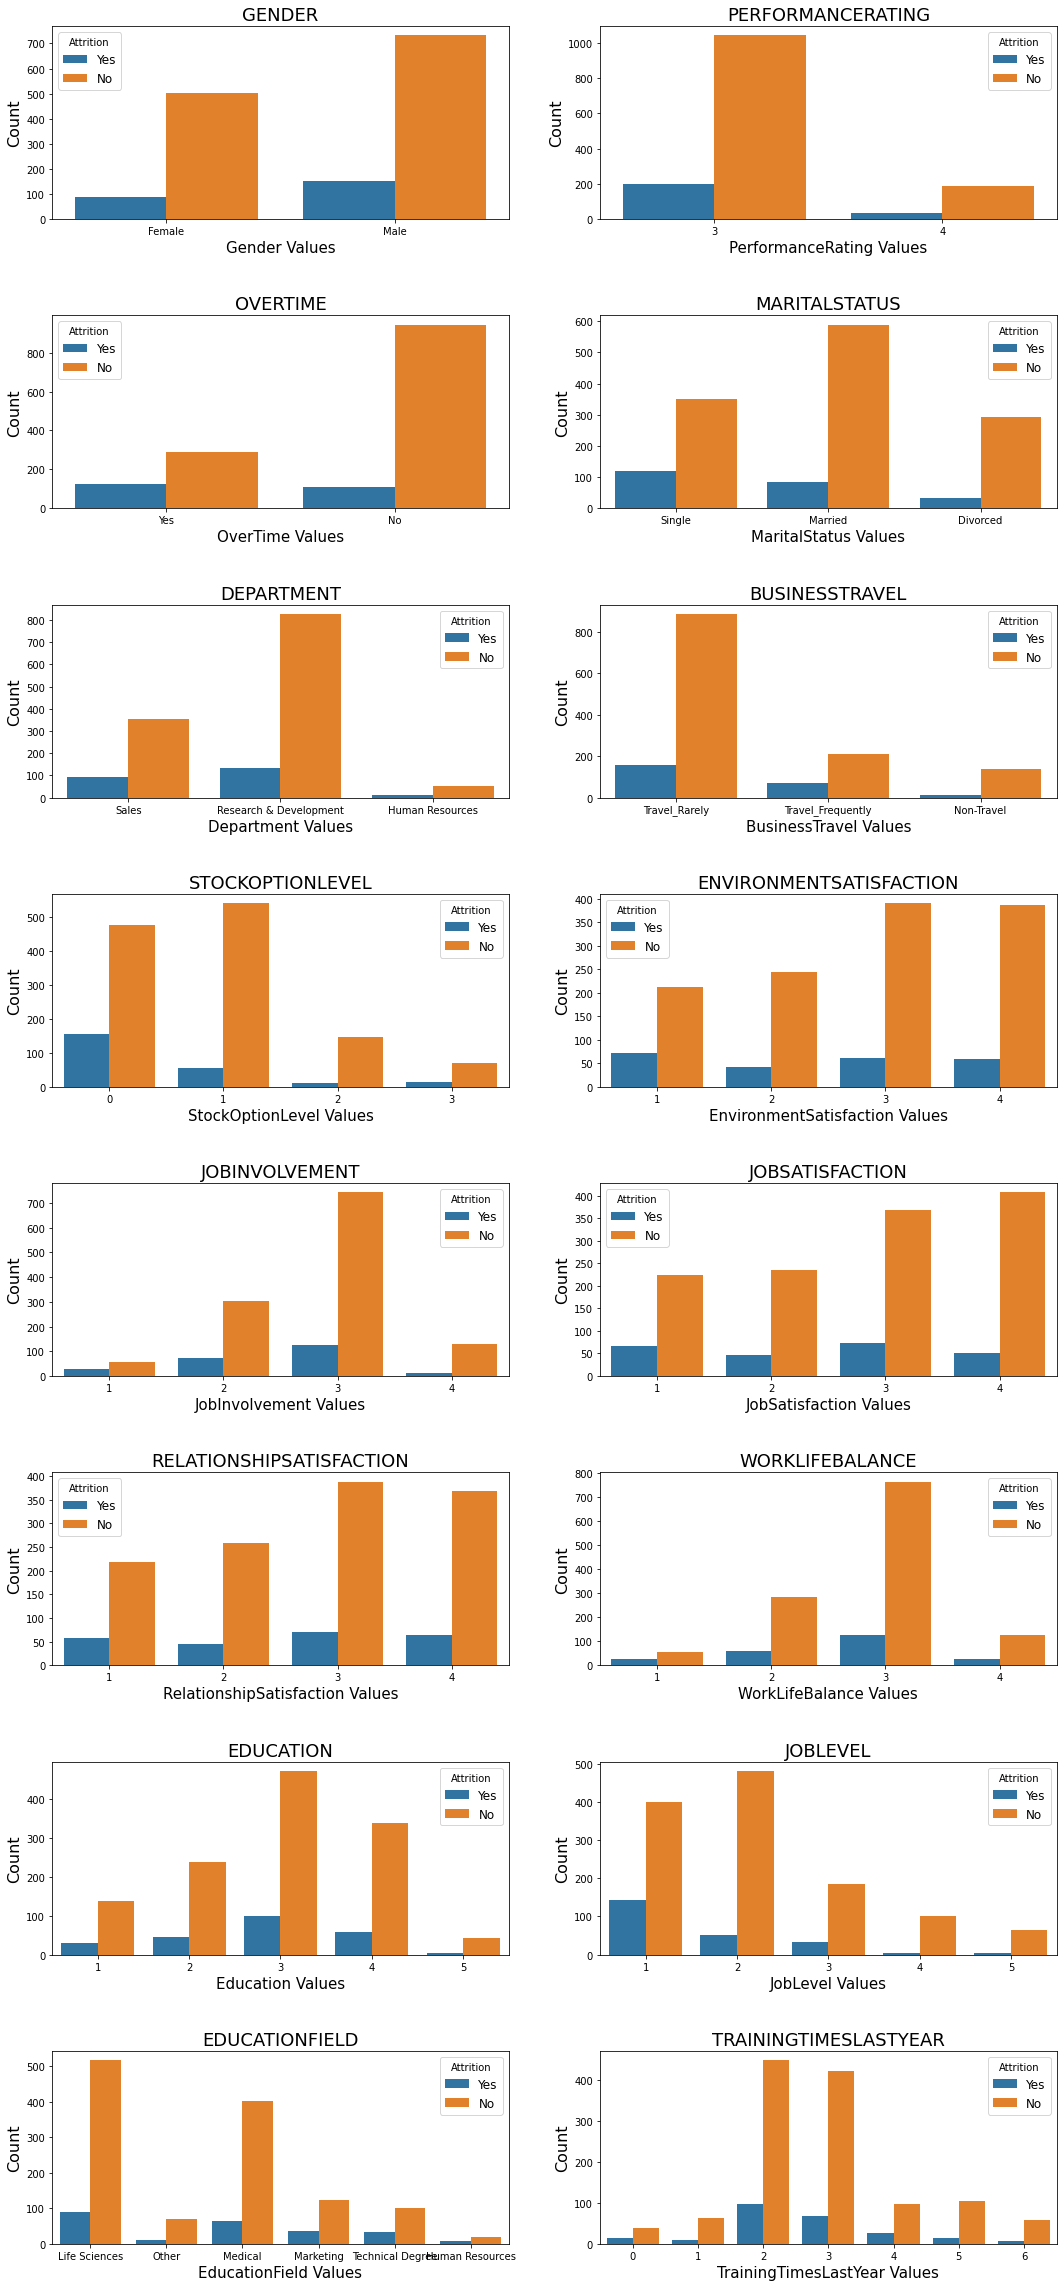

In [66]:
cat_cols = ['Over18', 'StandardHours', 'EmployeeCount', 'Gender', 'PerformanceRating', 
            'OverTime', 'MaritalStatus', 'Department', 'BusinessTravel', 'StockOptionLevel', 
            'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 
            'RelationshipSatisfaction', 'WorkLifeBalance', 'Education', 
            'JobLevel', 'EducationField', 'TrainingTimesLastYear', 
            'JobRole', 'NumCompaniesWorked']

# constant features
const_list = ['EmployeeCount',  'Over18',  'StandardHours']

df_train=dframe

#df_train.drop(const_list,axis=1, inplace=True)

print("UNDERSTANDING THE CATEGORICAL DISTRIBUTION BY THE TARGET (ATTRITION)")
print("NOTE: - It's a plot just about the columns with maximum 10 values.")

cat_cols = [col for col in cat_cols if col not in (const_list +['Attrition'])]
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(18,35))
fig.subplots_adjust(hspace=0.5, bottom=0)
# fig.suptitle('BINARY FEATURES by the TARGET feature', fontsize=22)

for ax, catplot in zip(axes.flatten(), cat_cols):
        sns.countplot(x=catplot, data=df_train, hue='Attrition', ax=ax, )
        ## GEting the ratio of Years with current manager just to test into graphs
        ax.set_title(catplot.upper(), fontsize=18)
        ax.set_ylabel('Count', fontsize=16)
        ax.set_xlabel(f'{catplot} Values', fontsize=15)
        ax.legend(title='Attrition', fontsize=12)

        
#Education Values vs Job Satisfaction        
# plt.tight_layout()

In [74]:

dframe.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
import plotly.express as px
df = px.data.tips()

fig = px.bar(dframe, x="sex", y="total_bill", color="smoker", barmode="group",
             facet_row="time", facet_col="EducationField",
             category_orders={"EducationField": ["Thur", "Fri", "Sat", "Sun"]})
fig.show()

In [76]:
pd.unique(dframe.EducationField)

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [109]:
import plotly.express as px
df = px.data.tips()

fig = px.bar(dframe, x="Gender", 
             #y="RelationshipSatisfaction", 
             color="Attrition", barmode="group",
             #facet_row="time", 
             facet_col="EducationField",
             category_orders={"EducationField": ['Life Sciences', 'Other', 'Medical', 'Marketing',       'Technical Degree', 'Human Resources'],
                              "time": ["Lunch", "Dinner"]})
fig.show()

Minimum age on dataset is 18 and the maximum age is 60


Text(0, 0.5, 'Probability')

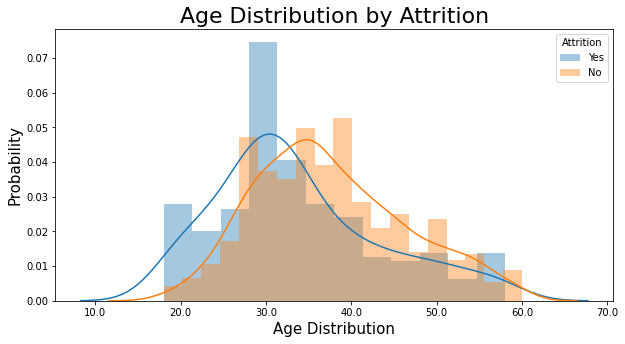

In [97]:
print(f'Minimum age on dataset is {df_train["Age"].min()} and the maximum age is {df_train["Age"].max()}')
plt.figure(figsize=(10,5))

g = sns.distplot(df_train[df_train['Attrition'] == 'Yes']['Age'], label='Yes')
g = sns.distplot(df_train[df_train['Attrition'] == 'No']['Age'], label="No")
g.set_xticklabels(g.get_xticks(),rotation=0)
g.legend(title='Attrition')
g.set_title("Age Distribution by Attrition", fontsize=22)
g.set_xlabel("Age Distribution",fontsize=15)
g.set_ylabel("Probability", fontsize=15)

In [112]:
data=dframe
def plot_distribution(var_select, bin_size) : 
# Calculate the correlation coefficient between the new variable and the target
    corr = data['Attrition'].corr(data[var_select])
    corr = np.round(corr,3)
    tmp1 = attrition[var_select]
    tmp2 = no_attrition[var_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['Yes_attrition', 'No_attrition']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, curve_type='kde', bin_size = bin_size)
    
    fig['layout'].update(title = var_select+' '+'(corr target ='+ str(corr)+')')

    py.iplot(fig, filename = 'Density plot')
    
def barplot(var_select, x_no_numeric) :
    tmp1 = data[(data['Attrition'] != 0)]
    tmp2 = data[(data['Attrition'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(data[var_select],data['Attrition']), )
    tmp3['Attr%'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100
    if x_no_numeric == True  : 
        tmp3 = tmp3.sort_values(1, ascending = False)

    color=['lightskyblue','gold' ]
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        name='Yes_Attrition',opacity = 0.8, marker=dict(
        color='gold',
        line=dict(color='#000000',width=1)))

    
    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        name='No_Attrition', opacity = 0.8, marker=dict(
        color='lightskyblue',
        line=dict(color='#000000',width=1)))
    
    trace3 =  go.Scatter(   
        x=tmp3.index,
        y=tmp3['Attr%'],
        yaxis = 'y2',
        name='% Attrition', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str(var_select),
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% Attrition'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)
    
    
plot_distribution('Age', False)
barplot('Age', False)
plot_distribution('DailyRate', 100)
plot_distribution('DistanceFromHome', False)
barplot('DistanceFromHome', False)
plot_distribution('HourlyRate', False)
plot_distribution('MonthlyIncome', 100)
plot_distribution('MonthlyRate', 100)
plot_distribution('NumCompaniesWorked', False)
barplot('NumCompaniesWorked',False)
plot_distribution('PercentSalaryHike', False)
barplot('PercentSalaryHike', False) 
plot_distribution('TotalWorkingYears', False)
barplot('TotalWorkingYears', False)
plot_distribution('TrainingTimesLastYear', False)
barplot('TrainingTimesLastYear',False)
plot_distribution('YearsAtCompany', False)
barplot('YearsAtCompany', False)
plot_distribution('YearsInCurrentRole', False)
barplot('YearsInCurrentRole', False)
plot_distribution('YearsSinceLastPromotion', False)
barplot('YearsSinceLastPromotion', False)
plot_distribution('YearsWithCurrManager', False)
barplot('YearsWithCurrManager', False)

TypeError: unsupported operand type(s) for /: 'str' and 'int'